# Loading Dataset and Importing library

In [ ]:
!pip install pycaret

     |████████████████████████████████| 266kB 7.4MB/s 
     |████████████████████████████████| 2.0MB 14.6MB/s 
     |████████████████████████████████| 1.4MB 33.1MB/s 
     |████████████████████████████████| 81kB 8.5MB/s 
     |████████████████████████████████| 6.8MB 31.2MB/s 
     |████████████████████████████████| 61kB 7.7MB/s 
     |████████████████████████████████| 112kB 51.0MB/s 
     |████████████████████████████████| 14.2MB 221kB/s 
     |████████████████████████████████| 1.7MB 25.6MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 174kB 41.6MB/s 
     |████████████████████████████████| 256kB 40.0MB/s 
     |████████████████████████████████| 276kB 40.1MB/s 
     |████████████████████████████████| 1.2MB 23.0MB/s 
     |████████████████████████████████| 81kB 7.9MB/s 
     |████████████████████████████████| 1.1MB 26.5MB/s

In [ ]:
# libraries for importing dataset  
import pandas as pd
import numpy as np
import urllib.request as urllib

# libraries for plotting
import matplotlib.pyplot as plt
import seaborn as sns

# Preprocessing
from sklearn import preprocessing, metrics
from sklearn.preprocessing import StandardScaler 
from scipy.stats import chi2_contingency
from scipy.stats import chi2


# Modelling
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
import keras
from keras.models import Sequential
from keras.layers import Dense

# Metrices
from sklearn.metrics import confusion_matrix, classification_report, mean_squared_error, mean_absolute_error, f1_score, r2_score
from sklearn.model_selection import cross_val_score
from sklearn.metrics import precision_score, recall_score

# Hyperparameter tuning
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import RepeatedStratifiedKFold

In [ ]:
!wget https://archive.ics.uci.edu/ml/machine-learning-databases/census-income/census-income.data

--2021-06-17 13:03:15--  https://archive.ics.uci.edu/ml/machine-learning-databases/census-income/census-income.data
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3974305 (3.8M) [application/x-httpd-php]
Saving to: ‘census-income.data’

census-income.data  100%[===================>]   3.79M  15.5MB/s    in 0.2s    

2021-06-17 13:03:16 (15.5 MB/s) - ‘census-income.data’ saved [3974305/3974305]



In [ ]:
!wget https://archive.ics.uci.edu/ml/machine-learning-databases/census-income/census-income.test

--2021-06-17 13:03:17--  https://archive.ics.uci.edu/ml/machine-learning-databases/census-income/census-income.test
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2003153 (1.9M) [application/x-httpd-php]
Saving to: ‘census-income.test’

census-income.test  100%[===================>]   1.91M  9.00MB/s    in 0.2s    

2021-06-17 13:03:17 (9.00 MB/s) - ‘census-income.test’ saved [2003153/2003153]



In [ ]:
column = ["age", "workclass", "fnlwgt", "education", "education_num", "marital-status", "occupation", "relationship",
          "race", "sex", "capital-gain", "capital-loss", "hours-per-week", "native-country", "income"] 

In [ ]:
train = pd.read_csv("census-income.data", header = None, names = column)

In [ ]:
train.head()

,age,workclass,fnlwgt,education,education_num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [ ]:
train.shape

(32561, 15)

In [ ]:
test = pd.read_csv("census-income.test", skiprows = 1, sep = ",", names = column)

In [ ]:
test.head()

,age,workclass,fnlwgt,education,education_num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K.
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K.
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K.
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K.
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K.


In [ ]:
test.shape

(16281, 15)

# Explanatory Data Analysis

### 1. Missing value:
The value count for each column and replacing the "?" with mode for the train dataset




In [ ]:
# Function to obtain the value count for all the columns
col_names = train.columns
for i in col_names:
  count = train[i].value_counts()
  print(i)
  print(count)

age
36    898
31    888
34    886
23    877
35    876
     ... 
83      6
85      3
88      3
87      1
86      1
Name: age, Length: 73, dtype: int64
workclass
 Private             22696
 Self-emp-not-inc     2541
 Local-gov            2093
 ?                    1836
 State-gov            1298
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: workclass, dtype: int64
fnlwgt
164190    13
203488    13
123011    13
113364    12
121124    12
          ..
284211     1
312881     1
177711     1
179758     1
229376     1
Name: fnlwgt, Length: 21648, dtype: int64
education
 HS-grad         10501
 Some-college     7291
 Bachelors        5355
 Masters          1723
 Assoc-voc        1382
 11th             1175
 Assoc-acdm       1067
 10th              933
 7th-8th           646
 Prof-school       576
 9th               514
 12th              433
 Doctorate         413
 5th-6th           333
 1st-4th           168
 Preschool          

From  the above result it is evident that "?" comes in 3 columns, that is, workclass, occupation and native country. We will change "?" by the mode 

In [ ]:
# Replacing ? with mode

train['workclass'] = train['workclass'].replace(' ?', 'Private')
train['occupation'] = train['occupation'].replace(' ?', 'Prof-specialty')
train['native-country'] = train['native-country'].replace(' ?', 'United-States')

In [ ]:
train.head()

,age,workclass,fnlwgt,education,education_num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


The value count for each column and replacing the "?" with mode for the test dataset

In [ ]:
# Function to obtain the value count for all the columns
col_names = test.columns
for i in col_names:
  count = test[i].value_counts()
  print(i)
  print(count)

age
35    461
33    460
23    452
36    450
38    437
     ... 
88      3
84      3
89      2
85      2
87      2
Name: age, Length: 73, dtype: int64
workclass
 Private             11210
 Self-emp-not-inc     1321
 Local-gov            1043
 ?                     963
 State-gov             683
 Self-emp-inc          579
 Federal-gov           472
 Without-pay             7
 Never-worked            3
Name: workclass, dtype: int64
fnlwgt
136986    9
127651    8
203488    8
190290    8
120277    8
         ..
119344    1
240175    1
45612     1
346478    1
235523    1
Name: fnlwgt, Length: 12787, dtype: int64
education
 HS-grad         5283
 Some-college    3587
 Bachelors       2670
 Masters          934
 Assoc-voc        679
 11th             637
 Assoc-acdm       534
 10th             456
 7th-8th          309
 Prof-school      258
 9th              242
 12th             224
 Doctorate        181
 5th-6th          176
 1st-4th           79
 Preschool         32
Name: education, dtype: 

From  the above result it is evident that "?" comes in 3 columns, that is, workclass, occupation and native country. We will change "?" by the mode 

In [ ]:
# Replacing ? with mode

test['workclass'] = test['workclass'].replace(' ?', 'Private')
test['occupation'] = test['occupation'].replace(' ?', 'Prof-specialty')
test['native-country'] = test['native-country'].replace(' ?', 'United-States')

In [ ]:
test.head()

,age,workclass,fnlwgt,education,education_num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K.
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K.
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K.
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K.
4,18,Private,103497,Some-college,10,Never-married,Prof-specialty,Own-child,White,Female,0,0,30,United-States,<=50K.


### 2. Visualization of columns having numerical values and categorical values

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education_num   32561 non-null  int64 
 5   marital-status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital-gain    32561 non-null  int64 
 11  capital-loss    32561 non-null  int64 
 12  hours-per-week  32561 non-null  int64 
 13  native-country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [ ]:
# Obtaining the columns having numerical values

num_columns = train.select_dtypes(include=['int'])
print(num_columns.columns)

Index(['age', 'fnlwgt', 'education_num', 'capital-gain', 'capital-loss',
       'hours-per-week'],
      dtype='object')


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fec4b159668>,
      dtype=object)

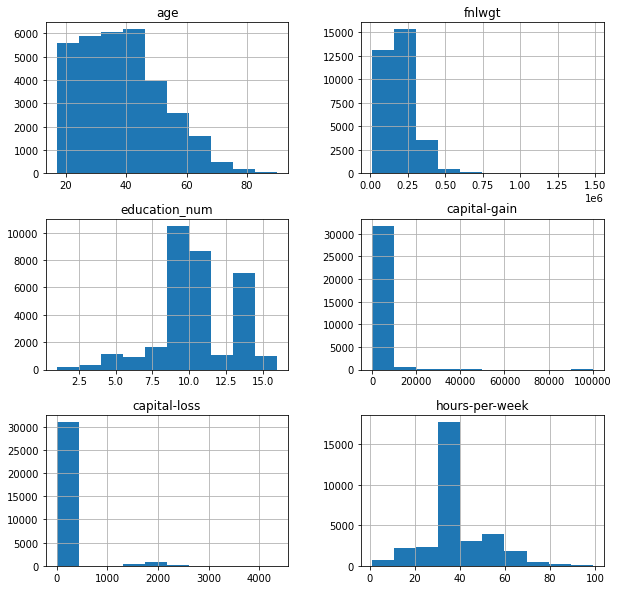

In [ ]:
# Plotting histogram
num_columns.hist(figsize=(10,10))

In [ ]:
# Obtaining the categorical columns

cat_columns = train.select_dtypes(include=['object'])
print(cat_columns.columns)

Index(['workclass', 'education', 'marital-status', 'occupation',
       'relationship', 'race', 'sex', 'native-country', 'income'],
      dtype='object')


In [ ]:
# Effect of workclass on income

cat_columns.groupby('workclass').count()

,education,marital-status,occupation,relationship,race,sex,native-country,income
workclass,,,,,,,,
Federal-gov,960,960,960,960,960,960,960,960
Local-gov,2093,2093,2093,2093,2093,2093,2093,2093
Never-worked,7,7,7,7,7,7,7,7
Private,22696,22696,22696,22696,22696,22696,22696,22696
Self-emp-inc,1116,1116,1116,1116,1116,1116,1116,1116
Self-emp-not-inc,2541,2541,2541,2541,2541,2541,2541,2541
State-gov,1298,1298,1298,1298,1298,1298,1298,1298
Without-pay,14,14,14,14,14,14,14,14
Private,1836,1836,1836,1836,1836,1836,1836,1836


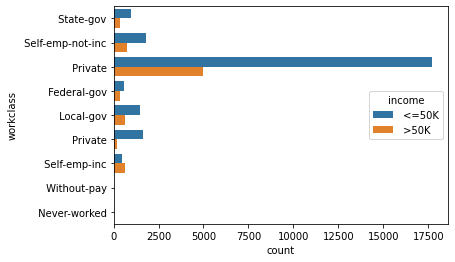

In [ ]:
# Plotting workclass vs income

sns.countplot(y='workclass', hue='income', data = cat_columns)

*italicized text*

In [ ]:
# Effect of occupation on income

cat_columns.groupby('occupation').count()

,workclass,education,marital-status,relationship,race,sex,native-country,income
occupation,,,,,,,,
Adm-clerical,3770,3770,3770,3770,3770,3770,3770,3770
Armed-Forces,9,9,9,9,9,9,9,9
Craft-repair,4099,4099,4099,4099,4099,4099,4099,4099
Exec-managerial,4066,4066,4066,4066,4066,4066,4066,4066
Farming-fishing,994,994,994,994,994,994,994,994
Handlers-cleaners,1370,1370,1370,1370,1370,1370,1370,1370
Machine-op-inspct,2002,2002,2002,2002,2002,2002,2002,2002
Other-service,3295,3295,3295,3295,3295,3295,3295,3295
Priv-house-serv,149,149,149,149,149,149,149,149


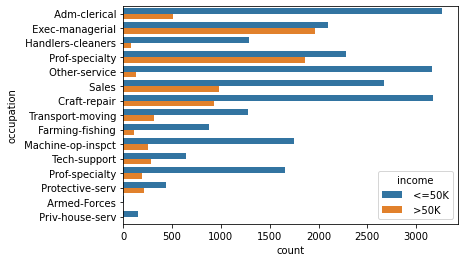

In [ ]:
# Plotting occupation vs income

sns.countplot(y='occupation', hue='income', data = cat_columns)

In [ ]:
# Effect of sex on income

cat_columns.groupby('sex').count()

,workclass,education,marital-status,occupation,relationship,race,native-country,income
sex,,,,,,,,
Female,10771,10771,10771,10771,10771,10771,10771,10771
Male,21790,21790,21790,21790,21790,21790,21790,21790


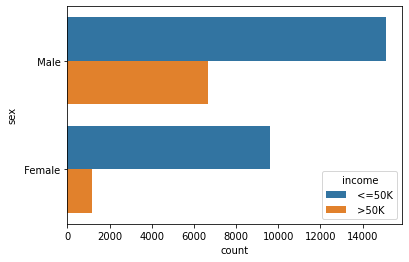

In [ ]:
# Plotting sex vs income

sns.countplot(y='sex', hue='income', data = cat_columns)

In [ ]:
# Relation between education and sex

cat_columns.groupby('education').count()

,workclass,marital-status,occupation,relationship,race,sex,native-country,income
education,,,,,,,,
10th,933,933,933,933,933,933,933,933
11th,1175,1175,1175,1175,1175,1175,1175,1175
12th,433,433,433,433,433,433,433,433
1st-4th,168,168,168,168,168,168,168,168
5th-6th,333,333,333,333,333,333,333,333
7th-8th,646,646,646,646,646,646,646,646
9th,514,514,514,514,514,514,514,514
Assoc-acdm,1067,1067,1067,1067,1067,1067,1067,1067
Assoc-voc,1382,1382,1382,1382,1382,1382,1382,1382


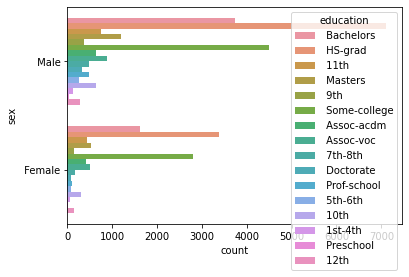

In [ ]:
# Plotting sex vs education

sns.countplot(y = 'sex', hue = 'education', data = cat_columns)

In [ ]:
# Effect of marital status on income

cat_columns.groupby('marital-status').count()

,workclass,education,occupation,relationship,race,sex,native-country,income
marital-status,,,,,,,,
Divorced,4443,4443,4443,4443,4443,4443,4443,4443
Married-AF-spouse,23,23,23,23,23,23,23,23
Married-civ-spouse,14976,14976,14976,14976,14976,14976,14976,14976
Married-spouse-absent,418,418,418,418,418,418,418,418
Never-married,10683,10683,10683,10683,10683,10683,10683,10683
Separated,1025,1025,1025,1025,1025,1025,1025,1025
Widowed,993,993,993,993,993,993,993,993


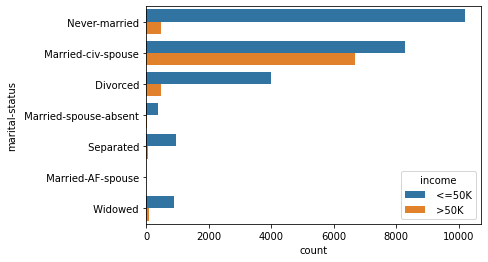

In [ ]:
# Plotting marital status vs income

sns.countplot(y = 'marital-status', hue = 'income', data = cat_columns)

### 3. Hypothesis testing


1. To test the relationship between workclass and income

**Chi-square goodness of fit :** A chi-square goodness of fit test allows us to test whether the observed proportions for a categorical variable differ from hypothesized proportions. The chi-square statistical test is used to determine whether there’s a significant difference between an expected distribution and an actual distribution.

In [ ]:
# Contingency table

contingency_table = pd.crosstab(train['workclass'].sample(frac=0.002, replace=True, random_state=1),
                                train['income'].sample(frac=0.002, replace=True, random_state=1),margins = False) 
contingency_table

income,<=50K,>50K
workclass,,
Local-gov,2,3
Private,38,8
Self-emp-inc,1,1
Self-emp-not-inc,3,0
State-gov,5,0
Private,4,0


The table determines whether one variable is depends on the other variable. This table is called contingency table. We can also determine the dependency using a statistical method called Pearson's Chi-Squared test.

**H0 :** There is no relationship between workclass and income\
**H1 :** There is a relationship between workclass and income

In [ ]:
stat, p, dof, expected = chi2_contingency(contingency_table)
print('degrees of freedom=%d' % dof)
print('p_value', p)
print(expected)

# interpret test-statistic
prob = 0.95
critical = chi2.ppf(prob, dof)
print('probability=%.3f, critical value=%.3f, statistic=%.3f' % (prob, critical, stat))
if abs(stat) >= critical:
    print('Result : Dependent (reject H0)')
else:
    print('Result : Independent (fail to reject H0)')

degrees of freedom=5
p_value 0.08096328825908083
[[ 4.07692308  0.92307692]
 [37.50769231  8.49230769]
 [ 1.63076923  0.36923077]
 [ 2.44615385  0.55384615]
 [ 4.07692308  0.92307692]
 [ 3.26153846  0.73846154]]
probability=0.950, critical value=11.070, statistic=9.805
Result : Independent (fail to reject H0)


We can interpret the test statistic in the context of the chi-squared distribution with the requisite number of degress of freedom as follows:\

If Statistic >= Critical Value: significant result, reject null hypothesis (H0), dependent.\
If Statistic < Critical Value: not significant result, fail to reject null hypothesis (H0), independent.

**Conclusion :** As we have accept the null hypothesis, that is, H0 we can conclude that there is no dependency between workclass and income

2. To test the relationship between education and income

**H0 :** There is no relationship between education and income\
**H1 :** There is a relationship between educaion and income

In [ ]:
# Contingency table

contingency_table = pd.crosstab(train['education'].sample(frac=0.002, replace=True, random_state=1),
                                train['income'].sample(frac=0.002, replace=True, random_state=1),margins = False) 
contingency_table

income,<=50K,>50K
education,,
10th,1,0
11th,4,0
7th-8th,1,0
9th,3,0
Assoc-acdm,2,0
Assoc-voc,2,2
Bachelors,7,4
Doctorate,1,0
HS-grad,22,1


In [ ]:
stat, p, dof, expected = chi2_contingency(contingency_table)
print('degrees of freedom=%d' % dof)
print('p_value', p)
print(expected)

# interpret test-statistic
prob = 0.95
critical = chi2.ppf(prob, dof)
print('probability=%.3f, critical value=%.3f, statistic=%.3f' % (prob, critical, stat))
if abs(stat) >= critical:
    print('Result : Dependent (reject H0)')
else:
    print('Result : Independent (fail to reject H0)')

degrees of freedom=11
p_value 0.20657766122750312
[[ 0.81538462  0.18461538]
 [ 3.26153846  0.73846154]
 [ 0.81538462  0.18461538]
 [ 2.44615385  0.55384615]
 [ 1.63076923  0.36923077]
 [ 3.26153846  0.73846154]
 [ 8.96923077  2.03076923]
 [ 0.81538462  0.18461538]
 [18.75384615  4.24615385]
 [ 3.26153846  0.73846154]
 [ 0.81538462  0.18461538]
 [ 8.15384615  1.84615385]]
probability=0.950, critical value=19.675, statistic=14.499
Result : Independent (fail to reject H0)


**Conclusion :** As we have accept the null hypothesis, that is, H0 we can conclude that there is no dependency between education and income

3. To test the relationship between gender and income

**H0 :** There is no relationship between gender and income\
**H1 :** There is a relationship between gender and income

In [ ]:
# Contingency table

contingency_table = pd.crosstab(train['sex'].sample(frac=0.002, replace=True, random_state=1),
                                train['income'].sample(frac=0.002, replace=True, random_state=1),margins = False) 
contingency_table

income,<=50K,>50K
sex,,
Female,17,0
Male,36,12


In [ ]:
stat, p, dof, expected = chi2_contingency(contingency_table)
print('degrees of freedom=%d' % dof)
print('p_value', p)
print(expected)

# interpret test-statistic
prob = 0.95
critical = chi2.ppf(prob, dof)
print('probability=%.3f, critical value=%.3f, statistic=%.3f' % (prob, critical, stat))
if abs(stat) >= critical:
    print('Result : Dependent (reject H0)')
else:
    print('Result : Independent (fail to reject H0)')

degrees of freedom=1
p_value 0.05494397325265139
[[13.86153846  3.13846154]
 [39.13846154  8.86153846]]
probability=0.950, critical value=3.841, statistic=3.684
Result : Independent (fail to reject H0)


**Conclusion :** As we have accept the null hypothesis, that is, H0 we can conclude that there is no dependency between gender and income

### 4. Correlation

Correlation between the numerical variables

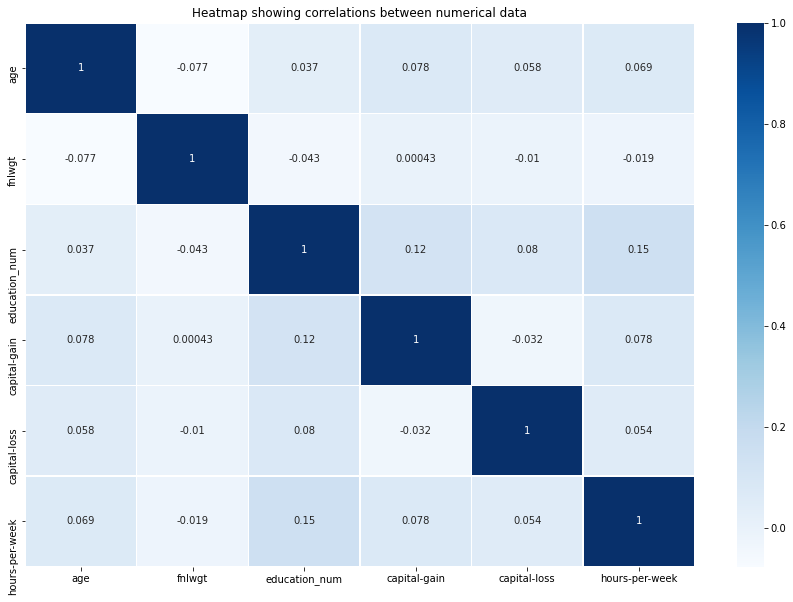

In [ ]:
plt.figure(figsize=(15,10))  
sns.heatmap(num_columns.corr(),annot=True,linewidths=.5, cmap="Blues")
plt.title('Heatmap showing correlations between numerical data')
plt.show()


**Interpretation :** 
1. There is no strong correlation between the numerical attributes
2. There is neither strong positive correlation nor strong negative correlation between the variables.
3. The strongest correlation is 0.078, which is between capital-gain and hours_per_week, which is also less than 0.1.

# Data Preprocessing

### 1. Encoding:
Encoding the categorical variable

In [ ]:
# Income for train data

train.income = train.income.replace(" <=50K", 0)
train.income = train.income.replace(" >50K", 1)

In [ ]:
train.head()

,age,workclass,fnlwgt,education,education_num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,0
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,0
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,0
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,0
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,0


In [ ]:
# Income for test data

test.income = test.income.replace(" <=50K.", 0)
test.income = test.income.replace(" >50K.", 1)

In [ ]:
test.head()

,age,workclass,fnlwgt,education,education_num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,0
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,0
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,1
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,1
4,18,Private,103497,Some-college,10,Never-married,Prof-specialty,Own-child,White,Female,0,0,30,United-States,0


In [ ]:
# list of the categorial columns
categorical = ["workclass", "education", "marital-status", "occupation", "relationship", "race", "sex", "native-country"]

# function for encoding the categorical columns
for features in categorical:
  le = preprocessing.LabelEncoder()
  train[features] = le.fit_transform(train[features])
  test[features] = le.transform(test[features])


### 2. Train and test data split

In [ ]:
x_train = train.drop('income', axis = 1)
y_train = train['income']

x_test = test.drop('income', axis = 1)
y_test = test['income']

### 3. Standardization

(array([[0., 0., 5., ..., 0., 0., 0.],
        [0., 1., 6., ..., 0., 0., 0.],
        [0., 0., 6., ..., 0., 0., 0.],
        ...,
        [0., 0., 6., ..., 0., 0., 0.],
        [0., 0., 6., ..., 0., 0., 0.],
        [0., 0., 5., ..., 0., 0., 0.]]),
 array([-5.99554116, -4.05652925, -2.11751734, -0.17850544,  1.76050647,
         3.69951838,  5.63853028,  7.57754219,  9.5165541 , 11.455566  ,
        13.39457791]),
 <a list of 32561 Lists of Patches objects>)

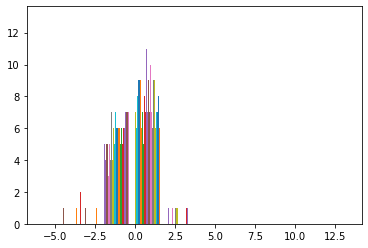

In [ ]:
scaler = StandardScaler()
x_train = pd.DataFrame(scaler.fit_transform(x_train), columns=x_train.columns) 
x_test = pd.DataFrame(scaler.transform(x_test), columns=x_test.columns)

plt.hist(x_train)

In [ ]:
x_train.head()

,age,workclass,fnlwgt,education,education_num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country
0,0.030671,1.658412,-1.063611,-0.335437,1.134739,0.921634,-1.483582,-0.277805,0.393668,0.703071,0.148453,-0.21666,-0.035429,0.251378
1,0.837109,1.026306,-1.008707,-0.335437,1.134739,-0.406212,-0.790510,-0.900181,0.393668,0.703071,-0.145920,-0.21666,-2.222153,0.251378
2,-0.042642,-0.237906,0.245079,0.181332,-0.420060,-1.734058,-0.328461,-0.277805,0.393668,0.703071,-0.145920,-0.21666,-0.035429,0.251378
3,1.057047,-0.237906,0.425801,-2.402511,-1.197459,-0.406212,-0.328461,-0.900181,-1.962621,0.703071,-0.145920,-0.21666,-0.035429,0.251378
4,-0.775768,-0.237906,1.408176,-0.335437,1.134739,-0.406212,0.595635,2.211698,-1.962621,-1.422331,-0.145920,-0.21666,-0.035429,-5.337971


In [ ]:
x_test.head()

,age,workclass,fnlwgt,education,education_num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country
0,-0.995706,-0.237906,0.350774,-2.402511,-1.197459,0.921634,-0.097437,0.966947,-1.962621,0.703071,-0.145920,-0.21666,-0.035429,0.251378
1,-0.042642,-0.237906,-0.947095,0.181332,-0.420060,-0.406212,-0.559485,-0.900181,0.393668,0.703071,-0.145920,-0.21666,0.774468,0.251378
2,-0.775768,-1.502118,1.394362,-0.852205,0.746039,-0.406212,0.826659,-0.900181,0.393668,0.703071,-0.145920,-0.21666,-0.035429,0.251378
3,0.397233,-0.237906,-0.279070,1.214869,-0.031360,-0.406212,-0.097437,-0.900181,-1.962621,0.703071,0.895083,-0.21666,-0.035429,0.251378
4,-1.508894,2.922623,-0.817458,1.214869,-0.031360,0.921634,1.750756,0.966947,0.393668,-1.422331,-0.145920,-0.21666,-0.845327,0.251378


# Building ML model

### 1. Logistic Regression

In [ ]:
lr = LogisticRegression()

model_lr = lr.fit(x_train, y_train)
prediction_lr = model_lr.predict(x_test)
lr_acc_train_score = lr.score(x_train, y_train)
lr_acc_test_score = lr.score(x_test, y_test)
print("Accuracy on the training data: {:,.4f}".format(lr_acc_train_score))
print("Accuracy on the test data: {:,.4f}".format(lr_acc_test_score))


Accuracy on the training data: 0.8249
Accuracy on the test data: 0.8253


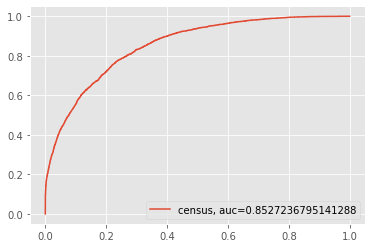

In [ ]:
# Plotting the AUC Curve

y_pred_proba = lr.predict_proba(x_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="census, auc="+str(auc))
plt.legend(loc=4)
plt.show()

### 2. Random Forest

In [ ]:
rfc = RandomForestClassifier()

model_rfc = rfc.fit(x_train, y_train)
prediction_rfc = model_rfc.predict(x_test)
rfc_acc_train_score = rfc.score(x_train, y_train)
rfc_acc_test_score = rfc.score(x_test, y_test)
print("Accuracy on the training data: {:,.4f}".format(rfc_acc_train_score))
print("Accuracy on the test data: {:,.4f}".format(rfc_acc_test_score))

Accuracy on the training data: 0.9999
Accuracy on the test data: 0.8529


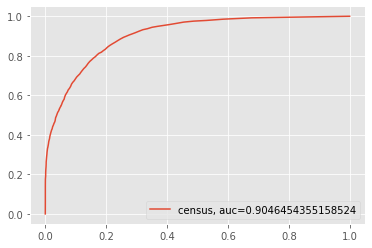

In [ ]:
# Plotting the AUC Curve

y_pred_proba = rfc.predict_proba(x_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="census, auc="+str(auc))
plt.legend(loc=4)
plt.show()

### 3. K Nearest Neighbor

In [ ]:
knn = KNeighborsClassifier(n_neighbors = 3) 
model_knn = knn.fit(x_train, y_train)  
prediction_knn = model_knn.predict(x_test) 
knn_acc_train_score = knn.score(x_train, y_train)
knn_acc_test_score = knn.score(x_test, y_test)
print("Accuracy on the training data: {:,.4f}".format(knn_acc_train_score))
print("Accuracy on the test data: {:,.4f}".format(knn_acc_test_score))

Accuracy on the training data: 0.8975
Accuracy on the test data: 0.8218


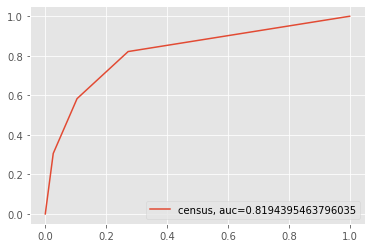

In [ ]:
# Plotting the AUC Curve

y_pred_proba = knn.predict_proba(x_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="census, auc="+str(auc))
plt.legend(loc=4)
plt.show()

### 4. Decision Tree Classifier

In [ ]:
dtc = DecisionTreeClassifier() 
model_dtc = dtc.fit(x_train, y_train)  
prediction_dtc = model_dtc.predict(x_test)  
dtc_acc_train_score = dtc.score(x_train, y_train)
dtc_acc_test_score = dtc.score(x_test, y_test)
print("Accuracy on the training data: {:,.4f}".format(dtc_acc_train_score))
print("Accuracy on the test data: {:,.4f}".format(dtc_acc_test_score ))

Accuracy on the training data: 1.0000
Accuracy on the test data: 0.8084


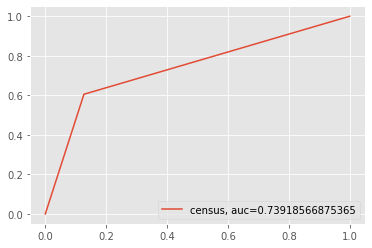

In [ ]:
# Plotting the AUC Curve

y_pred_proba = dtc.predict_proba(x_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="census, auc="+str(auc))
plt.legend(loc=4)
plt.show()

### 5. Gaussian Naive Bayes

In [ ]:
gnb = GaussianNB()

model_gnb = gnb.fit(x_train, y_train)
prediction_gnb = model_gnb.predict(x_test)
gnb_acc_train_score = gnb.score(x_train, y_train)
gnb_acc_test_score = gnb.score(x_test, y_test)
print("Accuracy on the training data: {:,.4f}".format(gnb_acc_train_score))
print("Accuracy on the test data: {:,.4f}".format(gnb_acc_test_score))

Accuracy on the training data: 0.8040
Accuracy on the test data: 0.8051


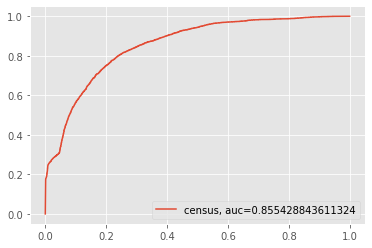

In [ ]:
# Plotting the AUC Curve

y_pred_proba = gnb.predict_proba(x_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="census, auc="+str(auc))
plt.legend(loc=4)
plt.show()

### 6. Neural Network

In [ ]:
classifier = Sequential()

# Adding the input layer and the first hidden layer
classifier.add(Dense(units = 128, activation = 'relu', input_dim = 14))
# Adding the second hidden layer
classifier.add(Dense(units = 8, kernel_initializer = 'uniform', activation = 'relu'))
# Adding the output layer
classifier.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'sigmoid'))
# Compiling the NN
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [ ]:
# Fitting the NN to the training set

fitting = classifier.fit(x_train, y_train, validation_data=(x_test, y_test), batch_size=32, epochs = 50)


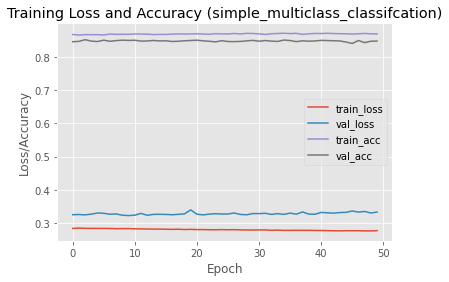

In [ ]:
# plot the training loss and accuracy for each epoch

N = np.arange(0, 50)
plt.style.use("ggplot")
plt.figure()
plt.plot(N, fitting.history["loss"], label="train_loss")
plt.plot(N, fitting.history["val_loss"], label="val_loss")
plt.plot(N, fitting.history["accuracy"], label="train_acc")
plt.plot(N, fitting.history["val_accuracy"], label="val_acc")
plt.title("Training Loss and Accuracy (simple_multiclass_classifcation)")
plt.xlabel("Epoch")
plt.ylabel("Loss/Accuracy")
plt.legend()
plt.savefig("training_performance.png")

In [ ]:
nn_acc_train_score = classifier.evaluate(x_train, y_train, verbose = 1)
nn_acc_test_score = classifier.evaluate(x_test, y_test, verbose = 1)


509/509 [==============================] - 0s 843us/step - loss: 0.3336 - accuracy: 0.8469


# Comparing the ML model

In [ ]:
results = pd.DataFrame({
    'Model': ['Logistic Regression',  'Random Forest', 'KNN', 'Decision Tree', 'Gaussian Naive Bayes', 'Neural Network'],
    'Train_Score': [lr_acc_train_score, rfc_acc_train_score, knn_acc_train_score, dtc_acc_train_score,
              gnb_acc_train_score, nn_acc_train_score[1]],
    'Test_Score': [lr_acc_test_score, rfc_acc_test_score, knn_acc_test_score, dtc_acc_test_score,
                   gnb_acc_test_score, nn_acc_test_score[1]] 
              })

result_df = results.sort_values(by='Train_Score', ascending=False)
result_df

,Model,Train_Score,Test_Score
3,Decision Tree,0.999969,0.808366
1,Random Forest,0.999939,0.852896
2,KNN,0.897515,0.821817
5,Neural Network,0.872117,0.846877
0,Logistic Regression,0.824913,0.825318
4,Gaussian Naive Bayes,0.803999,0.805110


From the train and validaion score it is evident that there is no overfitting. If we observe closely, we can see that for logistic regression and gaussian naive bayes the accuracy of training data seems to be slighly low than the accuracy of the test data.

# Pycaret library

### 1. Checking whether imbalance or not

In [ ]:
len(train[train['income']==0])

24720

In [ ]:
len(train[train['income']==1])

7841

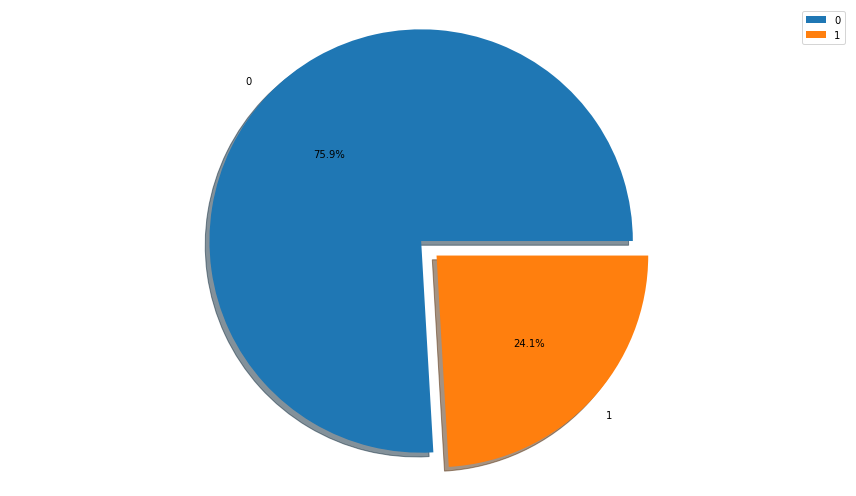

In [ ]:
explode = (0.1,0)  
fig1, ax1 = plt.subplots(figsize=(12,7))
ax1.pie(train['income'].value_counts(), explode=explode,labels=[0,1], autopct='%1.1f%%',
        shadow=True)
# Equal aspect ratio ensures that pie is drawn as a circle
ax1.axis('equal')  
plt.tight_layout()
plt.legend()
plt.show()

The number of person having income <=50K is 24720 and the number of person having income >50K is 7841. From this, it is evident that the dataset is imbalanced

In [ ]:
# importing module and initilizing setup
from pycaret.classification import *
reg = setup(data = train, target = "income")


,Description,Value
0,session_id,6885
1,Target,income
2,Target Type,Binary
3,Label Encoded,"<=50K: 0, >50K: 1"
4,Original Data,"(32561, 15)"
5,Missing Values,False
6,Numeric Features,5
7,Categorical Features,9
8,Ordinal Features,False
9,High Cardinality Features,False


### 2. Creating model using pycaret

In [ ]:
model_1 = create_model('lr')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.7956,0.6294,0.2368,0.7345,0.3581,0.2727,0.3350
1,0.8048,0.6059,0.2842,0.7500,0.4122,0.3225,0.3773
2,0.7894,0.5648,0.2336,0.6809,0.3478,0.2565,0.3090
3,0.7898,0.5685,0.2482,0.6700,0.3622,0.2669,0.3143
4,0.7867,0.5575,0.2409,0.6535,0.3520,0.2556,0.3014
5,0.7995,0.5946,0.2701,0.7220,0.3931,0.3017,0.3542
6,0.8069,0.6195,0.2969,0.7512,0.4256,0.3348,0.3871
7,0.7946,0.5954,0.2641,0.6938,0.3826,0.2880,0.3365
8,0.7999,0.6301,0.2696,0.7291,0.3936,0.3030,0.3570
9,0.7973,0.5622,0.2222,0.7771,0.3456,0.2671,0.3411


In [ ]:
model_1

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=6885, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
model_2 = create_model('knn')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.7662,0.6578,0.2914,0.5263,0.3751,0.2457,0.2619
1,0.7754,0.6588,0.3206,0.5587,0.4074,0.2812,0.2977
2,0.7679,0.6572,0.2865,0.5322,0.3725,0.2455,0.2632
3,0.7626,0.6406,0.2938,0.5111,0.3731,0.2396,0.2536
4,0.7661,0.6618,0.2719,0.5265,0.3586,0.2330,0.2520
5,0.7828,0.6787,0.3102,0.5923,0.4072,0.2898,0.3125
6,0.7841,0.6691,0.3260,0.5947,0.4212,0.3021,0.3227
7,0.7626,0.6367,0.3024,0.5123,0.3803,0.2454,0.2584
8,0.7635,0.6522,0.2987,0.5157,0.3783,0.2449,0.2588
9,0.7762,0.6451,0.2914,0.5694,0.3855,0.2658,0.2881


In [ ]:
model_2

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=5, p=2,
                     weights='uniform')

### 3. Visualization using pycaret

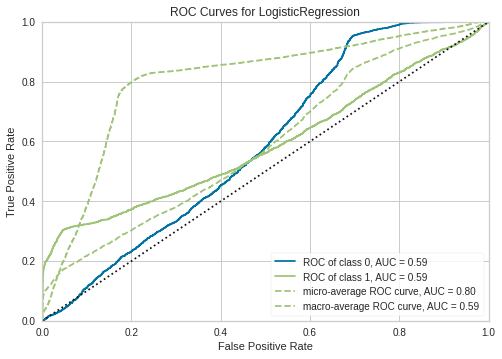

In [ ]:
plot_1 = plot_model(model_1)

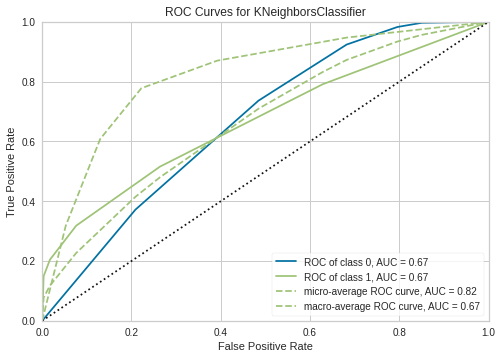

In [ ]:
plot_2 = plot_model(model_2)

### 4. Hyperparameter tuning using pycaret

In [ ]:
hypertune_1 = tune_model(model_1)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.7956,0.6294,0.2368,0.7345,0.3581,0.2727,0.3350
1,0.8048,0.6059,0.2842,0.7500,0.4122,0.3225,0.3773
2,0.7894,0.5648,0.2336,0.6809,0.3478,0.2565,0.3090
3,0.7898,0.5685,0.2482,0.6700,0.3622,0.2669,0.3143
4,0.7867,0.5575,0.2409,0.6535,0.3520,0.2556,0.3014
5,0.7995,0.5946,0.2701,0.7220,0.3931,0.3017,0.3542
6,0.8069,0.6195,0.2969,0.7512,0.4256,0.3348,0.3871
7,0.7946,0.5954,0.2641,0.6938,0.3826,0.2880,0.3365
8,0.7999,0.6301,0.2696,0.7291,0.3936,0.3030,0.3570
9,0.7973,0.5622,0.2222,0.7771,0.3456,0.2671,0.3411


In [ ]:
hypertune_2 = tune_model(model_2)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.7969,0.6940,0.2149,0.7867,0.3376,0.2613,0.3388
1,0.8009,0.6753,0.2441,0.7746,0.3712,0.2892,0.3577
2,0.7986,0.6915,0.2226,0.7871,0.3471,0.2696,0.3455
3,0.7960,0.6712,0.2391,0.7318,0.3604,0.2745,0.3357
4,0.7933,0.7001,0.2117,0.7484,0.3300,0.2505,0.3211
5,0.8047,0.7178,0.2427,0.8160,0.3741,0.2966,0.3738
6,0.8100,0.7038,0.2550,0.8537,0.3927,0.3170,0.3990
7,0.7986,0.6758,0.2459,0.7500,0.3704,0.2854,0.3486
8,0.7999,0.6947,0.2495,0.7569,0.3753,0.2906,0.3544
9,0.7999,0.6810,0.2204,0.8121,0.3467,0.2718,0.3533


### 5. Comparing different models using pycaret

In [ ]:
compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
catboost,CatBoost Classifier,0.8722,0.9278,0.6511,0.7820,0.7104,0.6294,0.6338,10.835
lightgbm,Light Gradient Boosting Machine,0.8717,0.9258,0.6566,0.7765,0.7113,0.6295,0.6333,0.312
xgboost,Extreme Gradient Boosting,0.8706,0.9254,0.6528,0.7745,0.7083,0.6259,0.6298,10.037
gbc,Gradient Boosting Classifier,0.8622,0.9168,0.5817,0.7911,0.6703,0.5857,0.5969,3.963
ada,Ada Boost Classifier,0.8605,0.9121,0.6121,0.7618,0.6786,0.5909,0.5968,1.397
rf,Random Forest Classifier,0.8542,0.9030,0.6147,0.7362,0.6698,0.5772,0.5812,2.748
lda,Linear Discriminant Analysis,0.8406,0.8915,0.5642,0.7139,0.6301,0.5304,0.5364,0.415
ridge,Ridge Classifier,0.8391,0.0000,0.5035,0.7453,0.6008,0.5048,0.5201,0.055
et,Extra Trees Classifier,0.8342,0.8782,0.5964,0.6766,0.6339,0.5273,0.5292,3.417
dt,Decision Tree Classifier,0.8114,0.7448,0.6165,0.6071,0.6114,0.4870,0.4872,0.251


# Metrics

### 1. Classification metrics

Confusion matrix

In [ ]:
# Confusion matrix for decision tree

confusion_matrix(y_test, prediction_dtc)


array([[10813,  1622],
       [ 1498,  2348]])

Precision and Recall

In [ ]:
# Precision and recall for decision tree
print("Precision:", precision_score(y_test, prediction_dtc))
print("Recall:",recall_score(y_test, prediction_dtc))

Precision: 0.5914357682619648
Recall: 0.6105044201768071


F1 score

In [ ]:
# f1_score of decision tree
f1_score(y_test, prediction_dtc)

0.6008188331627431

In [ ]:
r2_score(y_test, prediction_dtc)

-0.06213715376118101

### 2. Cross Validation

In [ ]:
print(cross_val_score(knn, x_train, y_train, cv=4))
print(cross_val_score(rfc, x_train, y_train, cv=2))

[0.81341359 0.82248157 0.82727273 0.82272727]
[0.85172901 0.85804668]


# Hyperparameter tuning

### 1. Hyperparameter tuning for logistic regression

In [ ]:
cv_method = RepeatedStratifiedKFold(n_splits=5, 
                                    n_repeats=3, 
                                    random_state=999)
LR = LogisticRegression()
LRparam_grid = [    
    {'penalty' : ['l1', 'l2', 'elasticnet', 'none'],
    'C' : np.logspace(-4, 4, 20),
    'solver' : ['lbfgs','newton-cg','liblinear','sag','saga'],
    'max_iter' : [100, 1000, 2500]
    }]

LR_search = GridSearchCV(LR, param_grid = LRparam_grid, cv = cv_method, verbose=True, n_jobs=-1)

# fitting the model for grid search 
best_LR = LR_search.fit(x_train , y_train)
best_LR.best_estimator_

# summarize
print(f'Accuracy on training data - : {best_LR.score(x_train, y_train):.5f}')
print(f'Accuracy on test data - : {best_LR.score(x_test, y_test):.5f}')


Fitting 15 folds for each of 1200 candidates, totalling 18000 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done 202 tasks      | elapsed:    8.2s
[Parallel(n_jobs=-1)]: Done 970 tasks      | elapsed:   39.9s
[Parallel(n_jobs=-1)]: Done 2101 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done 3454 tasks      | elapsed:  2.7min
[Parallel(n_jobs=-1)]: Done 5218 tasks      | elapsed:  4.1min
[Parallel(n_jobs=-1)]: Done 7554 tasks      | elapsed:  6.2min
[Parallel(n_jobs=-1)]: Done 10076 tasks      | elapsed:  8.4min
[Parallel(n_jobs=-1)]: Done 13362 tasks      | elapsed: 11.4min
[Parallel(n_jobs=-1)]: Done 16930 tasks      | elapsed: 14.6min
[Parallel(n_jobs=-1)]: Done 18000 out of 18000 | elapsed: 15.5min finished


Accuracy on training data - : 0.82501
Accuracy on test data - : 0.82624


There is a slight change in the accuracy of the training data after hyperparameter tuning

### 2. Hyperparameter tuning for Gaussian Naive Bayes

In [ ]:
cv_method = RepeatedStratifiedKFold(n_splits=5, 
                                    n_repeats=3, 
                                    random_state=999)
GNB = GaussianNB()

GNBparams_grid = {'var_smoothing': np.logspace(0,-9, num=100)}

GNB_search = GridSearchCV(estimator=GNB, 
                     param_grid=GNBparams_grid, 
                     cv=cv_method,
                     verbose=1, 
                     scoring='accuracy')
# fitting the model for grid search 
best_GNB = GNB_search.fit(x_train , y_train)
best_GNB.best_estimator_

# summarize
print(f'Accuracy on training data - : {best_GNB.score(x_train, y_train):.5f}')
print(f'Accuracy on test data - : {best_GNB.score(x_test, y_test):.5f}')


Fitting 15 folds for each of 100 candidates, totalling 1500 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Accuracy on training data - : 0.81923
Accuracy on test data - : 0.81801


[Parallel(n_jobs=1)]: Done 1500 out of 1500 | elapsed:   26.0s finished


The accuracy of the training score increases after hyperparameter tuning